# ANÁLISE EXPLORATÓRIA

#### IMPORTANDO BIBLIOTECAS

In [491]:
# Biblioteca Pandas para manipulação de dataframes
import pandas as pd  # Carrega a biblioteca Pandas

# Biblioteca Matplotlib para visualização de dados
import matplotlib.pyplot as plt  # Carrega a biblioteca Matplotlib para plotagem

# Selecionando estilos de gráficos 
plt.style.use("ggplot")  # Define o estilo dos gráficos como "ggplot"

# Importando biblioteca locale para formatar valores na moeda brasileira
import locale  # Importa a biblioteca locale para formatação de valores

# Setando o locale para o Brasil (ajuste para o seu país se necessário)
locale.setlocale(locale.LC_ALL, 'pt_BR')  # Define o locale para o Brasil

import seaborn as sns  # Importa a biblioteca Seaborn para visualização de dados

#### CRIANDO UMA FUNÇÃO PARA FORMATAR OS VALORES PARA A MOEDA BRASILEIRA

In [492]:
# Criando uma função para formatar os valores para a moeda brasileira
def moeda(valor):
    valor = locale.format_string("R$ %.2f", valor, grouping=True)
    return valor

#### CARREGANDO E VISUALIZANDO UMA AMOSTRA DA BASE DE DADOS

In [493]:
# Carregando base de dados
df = pd.read_excel("AdventureWorks.xlsx")

# Adicionando uma coluna com o lucro
df['Lucro'] = df['Valor Venda'] - (df['Custo Unitário'] * df['Quantidade'])


In [494]:
# Exibindo uma amostra de 3 valores
display(df.sample(3))

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Lucro
817,2009-11-14,2009-11-23,199,384,19015,200911143CS930,348.58,758.0,6,909.6,3638.4,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,1546.92
522,2009-10-16,2009-10-25,306,1226,19075,200910164CS765,330.99,999.0,10,1998.0,7992.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,4682.10
897,2009-06-12,2009-06-22,307,1226,19126,200906124CS716,330.99,999.0,6,599.4,5394.6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,3408.66


In [495]:
# Verificando a existência de valores nulos
print(df.isnull().sum())

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Lucro             0
dtype: int64


#### COMPARANDO ANO A ANO

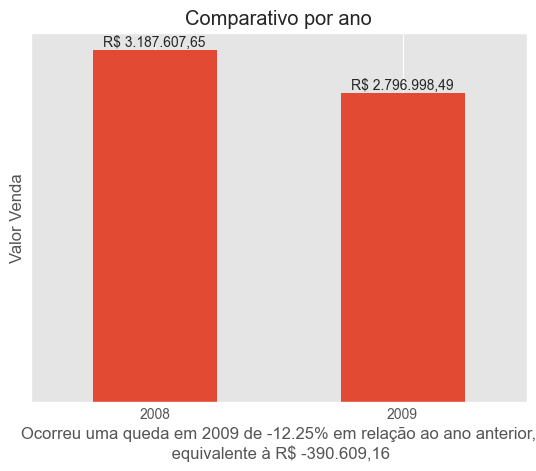

In [496]:
# Somando as vendas de 2008
venda_2008 = df.loc[df['Data Venda'].dt.year == 2008, 'Valor Venda'].sum()  # Soma das vendas em 2008

# Somando as vendas de 2009
venda_2009 = df.loc[df['Data Venda'].dt.year == 2009, 'Valor Venda'].sum()  # Soma das vendas em 2009

# Escrevendo uma conclusão sobre o comparativo
mensagem = (f"Ocorreu uma queda em 2009 de {format((venda_2009 / venda_2008)-1,".2%")} em relação ao ano anterior,\n equivalente à {moeda(venda_2009 - venda_2008)}")  # Cria uma mensagem com a variação percentual e valor absoluto da queda

# Agrupando valor vendido por ano
ano_vs_ano = df.groupby(df['Data Venda'].dt.year)['Valor Venda'].sum()  # Agrupa os dados por ano e soma as vendas

# Plotando em um gráfico de barras
ax = ano_vs_ano.plot.bar(title='Comparativo por ano')  # Cria um gráfico de barras

# Adicionando rótulo para cada coluna (acima da barra)
for i, valor in enumerate(ano_vs_ano):  # Itera sobre os valores e adiciona rótulos
    ax.annotate(f'{moeda(valor)}', xy=(i, valor), xytext=(0, 3), textcoords="offset points", ha='center') 

# Configurações adicionais do gráfico
plt.xticks(rotation='horizontal')  # Rotaciona os rótulos do eixo x
plt.yticks([])  # Remove os rótulos do eixo y
plt.xlabel(mensagem)  # Define o rótulo do eixo x com a mensagem de conclusão
plt.ylabel("Valor Venda")  # Define o rótulo do eixo y

# Exibindo o gráfico
plt.show()


### COMPARANDO MÊS / ANO

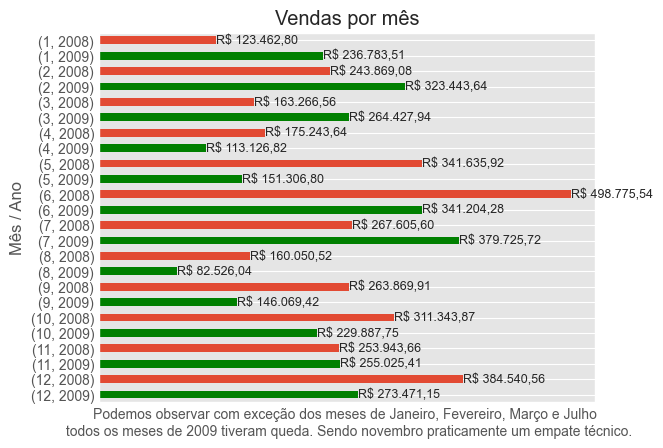

In [497]:
# Criando uma coluna com o número do mês
df['Numero_Mes'] = df['Data Venda'].dt.month  # Extrai o mês da data de venda e cria uma nova coluna

# Agrupando e ordenando por número do mês
mes_ano = df.groupby(['Numero_Mes', df['Data Venda'].dt.year])['Valor Venda'].sum()  # Agrupa por mês e ano, soma as vendas
mes_ano = mes_ano.sort_index(level='Numero_Mes', ascending=False)  # Ordena por mês em ordem decrescente

# Plotando em um gráfico de barras
ax = mes_ano.plot.barh(title='Vendas por mês', color=['green','#E24A33'])  # Cria um gráfico de barras horizontal

# Adicionando rótulos nas barras
for valor in ax.containers:  # Itera sobre as barras e adiciona rótulos
    ax.bar_label(valor, fmt=moeda, label_type='edge', fontsize=9)

# Mensagem para o eixo x
mensagem = "Podemos observar com exceção dos meses de Janeiro, Fevereiro, Março e Julho \n todos os meses de 2009 tiveram queda. Sendo novembro praticamente um empate técnico."  

# Configurações adicionais do gráfico
plt.xlabel(mensagem,fontsize=10)  # Define o rótulo do eixo x
plt.ylabel("Mês / Ano")  # Define o rótulo do eixo y
plt.xticks([])  # Remove os rótulos do eixo x

# Exibindo o gráfico
plt.show()


### ANALISANDO POR MARCA / ANO

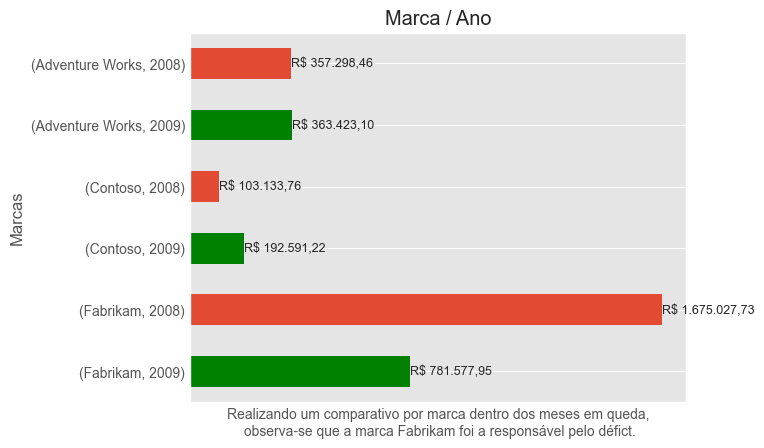

In [498]:
# Filtrando as vendas apenas dos meses onde teve queda
meses_queda = [4, 5, 6, 8, 9, 10, 12]  # Lista dos meses com queda nas vendas
df_queda = df.loc[df['Numero_Mes'].isin(meses_queda)]  # Filtra o DataFrame para os meses com queda

# Agrupando e ordenando por marca e ano
marca_ano = df_queda.groupby(['Marca', df['Data Venda'].dt.year])['Valor Venda'].sum()  # Agrupa por marca e ano, soma as vendas
marca_ano = marca_ano.sort_index(level='Marca', ascending=False)  # Ordena por marca em ordem decrescente

# Plotando em um gráfico de barras
ax = marca_ano.plot.barh(title='Marca / Ano', color=['green','#E24A33'])  # Cria um gráfico de barras horizontal

# Adicionando rótulos nas barras
for valor in ax.containers:  # Itera sobre as barras e adiciona rótulos
    ax.bar_label(valor, fmt=moeda, label_type='edge', fontsize=9)

 # Mensagem para o eixo x
mensagem = "Realizando um comparativo por marca dentro dos meses em queda,\n observa-se que a marca Fabrikam foi a responsável pelo défict." 

# Configurações adicionais do gráfico
plt.xlabel(mensagem,fontsize=10)  # Define o rótulo do eixo x
plt.ylabel("Marcas")  # Define o rótulo do eixo y
plt.xticks([])  # Remove os rótulos do eixo x

# Exibindo o gráfico
plt.show()

In [499]:
# Analisando a marca Fabrikam
df_fabrikam = df.loc[df['Marca'] == 'Fabrikam']  # Filtra o DataFrame para a marca Fabrikam

# Lista de produtos disponíveis
display(df_fabrikam['Produto'].sort_values(ascending=True).unique())  # Lista os produtos únicos da marca Fabrikam em ordem alfabética


array(["Fabrikam Trendsetter 1/3'' 8.5mm X200 Black",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 White",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Black",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Grey"], dtype=object)

#### Analisando a venda dos produtos da marca Fabrikam

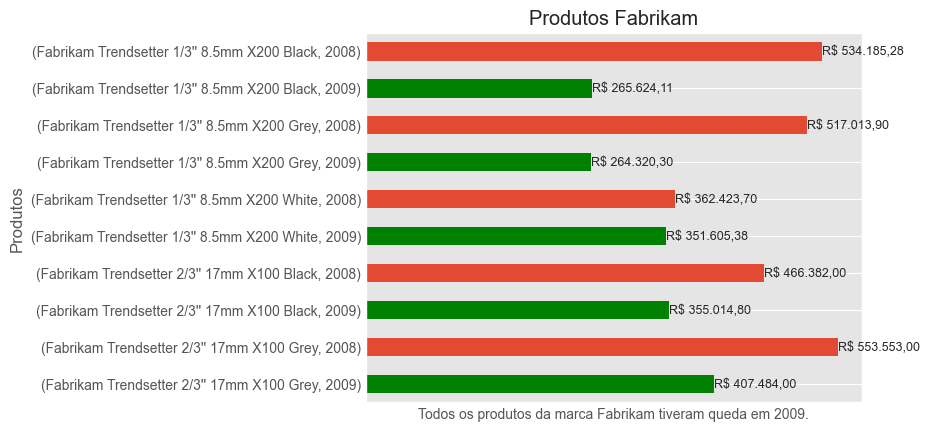

In [500]:
# Agrupa os dados por produto e ano, somando o valor total de vendas por essa combinação
produtos = df_fabrikam.groupby(['Produto', df_fabrikam['Data Venda'].dt.year])['Valor Venda'].sum()

# Ordena os dados pelo nome do produto em ordem decrescente, mantendo a hierarquia dos anos
produtos = produtos.sort_index(level='Produto', ascending=False) # Ordenando pelo primeiro nível do índice

# Cria um gráfico de barras horizontal com os dados agrupados
# Utiliza cores verde e #E24A33 para as barras
ax = produtos.plot.barh(title='Produtos Fabrikam', color=['green','#E24A33'])

# Adiciona rótulos nas barras com o valor formatado de acordo com a variável 'moeda'
# Posiciona os rótulos na borda das barras e define o tamanho da fonte
for valor in ax.containers:
 ax.bar_label(valor, fmt=moeda, label_type='edge', fontsize=9)

# Define uma mensagem para o eixo x, indicando a tendência geral das vendas em 2009
mensagem = "Todos os produtos da marca Fabrikam tiveram queda em 2009."

# Configura o rótulo do eixo x com a mensagem definida e ajusta o tamanho da fonte
plt.xlabel(mensagem,fontsize=10)
# Configura o rótulo do eixo y e remove os rótulos dos ticks do eixo x
plt.ylabel("Produtos")
plt.xticks([]);

# Exibe o gráfico gerado
plt.show()

#### CALCULANDO NÚMERO DE NOTAS, TICKET MÉDIO E QUANTIDADE DE PRODUTOS VENDIDOS

In [501]:
# Calculando o número de notas por ano
numero_notas = df_fabrikam.groupby([df_fabrikam['Data Venda'].dt.year])['No. Venda'].count()

# Calculando o ticket médio por ano e formatando a saída
grouped = df_fabrikam.groupby(df_fabrikam['Data Venda'].dt.year)
ticket_medio = (grouped['Valor Venda'].sum() / grouped['No. Venda'].count()).rename('Ticket Médio')

# Calculando a quantidade de produtos vendidos por ano
qtd_produtos_vendidos = df_fabrikam.groupby([df_fabrikam['Data Venda'].dt.year])['Quantidade'].sum()

# Imprimindo os resultados
print("Número de Notas por Ano:\n", numero_notas)
print("\nTicket Médio por Ano:\n", ticket_medio)
print("\nQuantidade de Produtos Vendidos por Ano:\n", qtd_produtos_vendidos)


Número de Notas por Ano:
 Data Venda
2008    286
2009    208
Name: No. Venda, dtype: int64

Ticket Médio por Ano:
 Data Venda
2008    8508.943636
2009    7904.079760
Name: Ticket Médio, dtype: float64

Quantidade de Produtos Vendidos por Ano:
 Data Venda
2008    2671
2009    1860
Name: Quantidade, dtype: int64


#### CRIANDO UMA MATRIZ COM INDICADORES

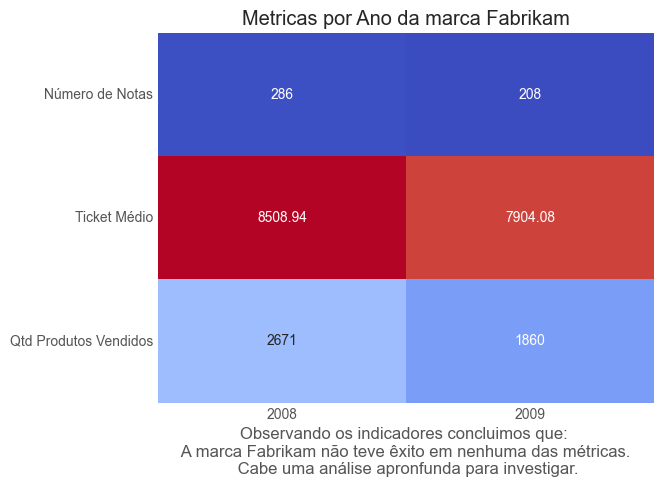

In [502]:
# Criando um DataFrame com os resultados
dados_matriz = pd.DataFrame({
 'Número de Notas': numero_notas,
 'Ticket Médio': ticket_medio,
 'Qtd Produtos Vendidos': qtd_produtos_vendidos
})

# Transpondo o DataFrame para ter os anos como colunas
dados_matriz = dados_matriz.T

# Criando o heatmap
sns.heatmap(dados_matriz, annot=True, fmt='g', cmap='coolwarm', cbar=False)

mensagem = "Observando os indicadores concluimos que: \n A marca Fabrikam não teve êxito em nenhuma das métricas. \n Cabe uma análise apronfunda para investigar."
# Personalizando o gráfico
plt.title('Metricas por Ano da marca Fabrikam')
plt.yticks(rotation='horizontal')
plt.xlabel(mensagem)
# Exibindo o gráfico
plt.show()
